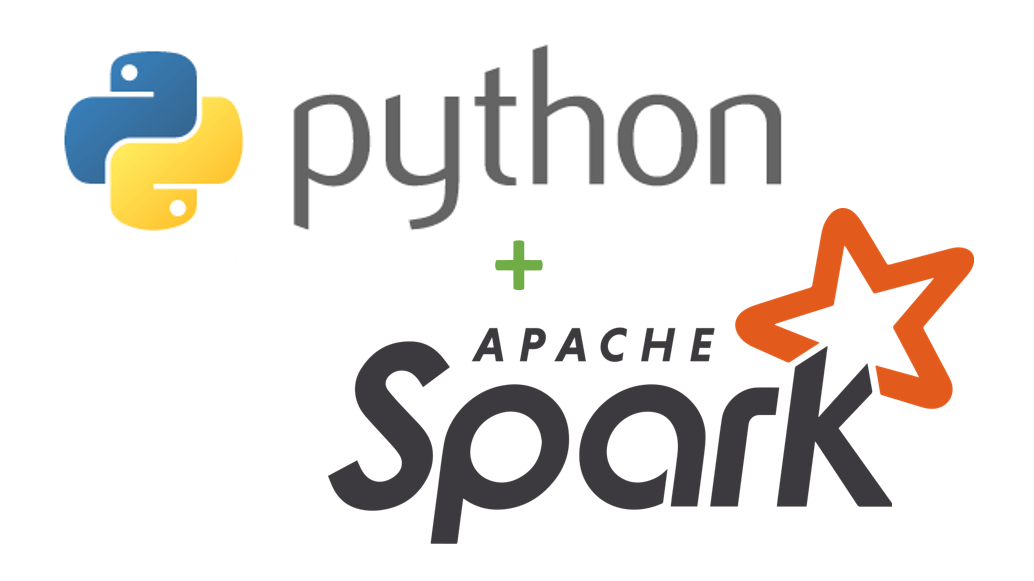

## **Uma Breve Introdução ao PySpark**

**PySpark** é uma linguagem de programação criada pela *Apache Software Foundation* que permite a análise e processamento de grandes conjuntos de dados de forma distribuída em um cluster de computadores. 
<br>
Isso torna o PySpark uma excelente opção para lidar com dados em grande escala (Big Data) e para realizar tarefas como:
1. Análise exploratória de dados;
2. Construção de pipelines de dados;
3. Criação de modelos de aprendizado de máquina;
4. Criação de ETLs.

A principal vantagem do **PySpark** é sua capacidade de lidar com grandes conjuntos de dados de maneira eficiente e escalável. Ele usa o ***Apache Spark***, um motor de **computação distribuído**, para dividir o processamento de dados em várias máquinas. Isso permite que o PySpark processe grandes quantidades de dados muito mais rapidamente do que seria possível com uma única máquina.

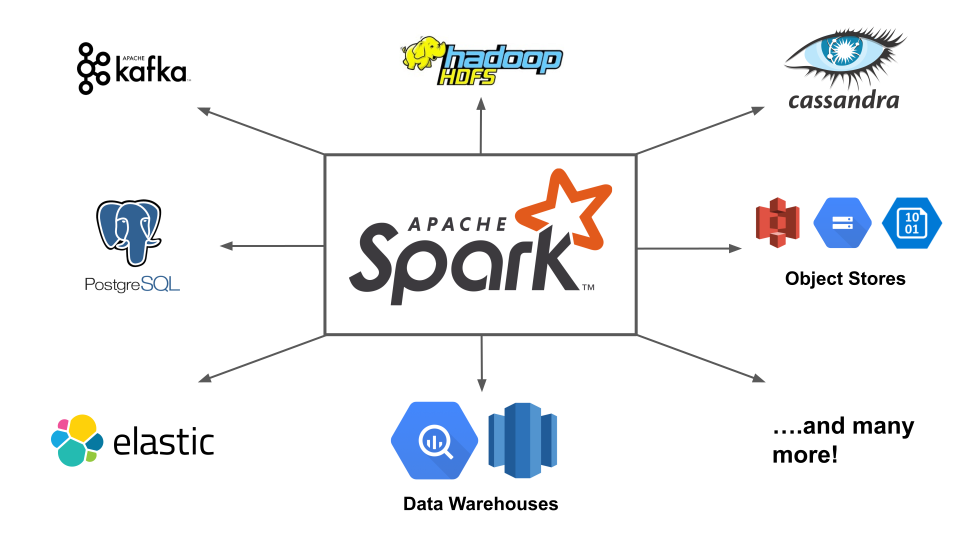

**Ecossistema**

O Spark facilita o início do trabalho com sistemas de computação distribuídos.

Por meio de seu suporte de API principal para vários idiomas, bibliotecas nativas que permitem streaming fácil, aprendizado de máquina, computação gráfica e SQL - o ecossistema Spark oferece alguns dos recursos e recursos mais amplos de qualquer tecnologia existente.

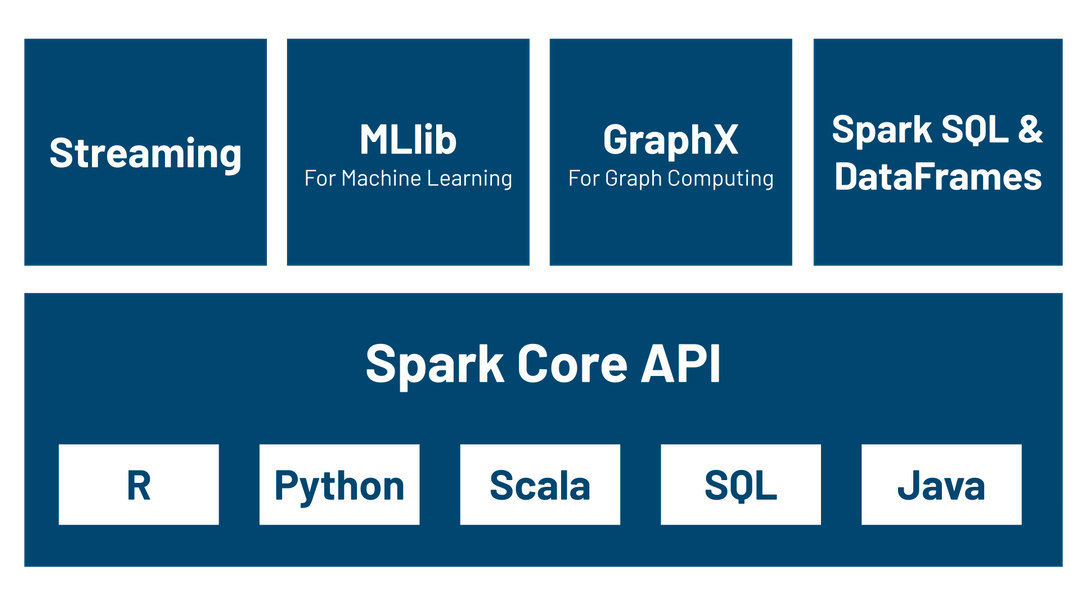

## **Sistema distribuído**

Um motor de computação distribuído é um software que permite que uma tarefa ou processamento seja dividido em várias partes, para ser executado simultaneamente em diferentes computadores de um cluster.
<br> 
Isso permite que o processamento seja feito de forma mais rápida e eficiente do que seria possível em um único computador, já que várias máquinas trabalham juntas para realizar a tarefa em paralelo.





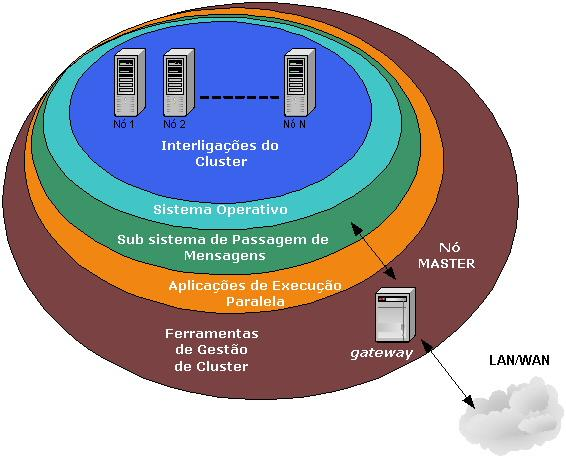

[Site do Spark](https://spark.apache.org/)

Instalar o Spark

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=e3a42b53104dee3b4130591b7edb497d20850dba4882d69567510ef207b7dd37
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [2]:
# Bibliotecas Spark
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

# Libs para análise gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Libs de Dados
import pandas as pd
import numpy as np

**O que vamos importar:**
<br>
<br>
**SparkSession**: é a classe principal que permite a criação de uma sessão Spark para executar as tarefas de processamento de dados e modelagem.
<br>
<br>
**functions**: é um módulo que contém várias funções do Spark SQL que podem ser usadas para transformar e manipular dados.
<br>
<br>
**VectorAssembler**: é uma classe do PySpark que permite a conversão de várias colunas de dados em uma única coluna de vetor, que é frequentemente usada como entrada para modelos de aprendizado de máquina.
<br>
<br>
**LogisticRegression**: é uma classe de modelo de aprendizado de máquina que é frequentemente usada para problemas de classificação binária.
<br>
<br>

Baixar a base de dados: https://drive.google.com/file/d/1Ga-g7niXzdGoEyBoHN9dgWnZ4i3ZQ4hG/view?usp=sharing

In [3]:
# SparkSession é usada para criar uma sessão Spark, 
# que é a principal interface de programação para executar tarefas de processamento de dados e modelagem no PySpark. 

# Create a SparkSession
spark = SparkSession.builder.appName('Projeto_Bancario').getOrCreate()

spark

**Breve entendimento da seção criada pelo spark:**
<br>
<br>
**"SparkSession - in-memory"**: indica que a sessão Spark foi criada na memória, ou seja, o processamento será feito na própria máquina local.
<br>
<br>
**"SparkContext"**: indica que o SparkContext também foi criado, o que é necessário para iniciar a sessão Spark.
<br>
<br>
**"Spark UI**": é a interface do usuário do Spark, que permite visualizar informações sobre as tarefas de processamento em execução.
<br>
<br>
**"Version v3.3.2"**: indica a versão do Spark que está sendo usada.
<br>
<br>
**"Master local[]"**: indica que a execução está sendo feita localmente, utilizando todos os núcleos da máquina disponíveis ("").
<br>
<br>
**"AppName Projeto_Bancario"**: indica o nome da aplicação, que foi definido na linha de código que você executou.

In [4]:
# Carregar os dados
Base_Dados = spark.read.csv('data.csv', header=True, inferSchema=True)

**Estudo**
<br>
Houve uma queda nas receitas de um banco português e eles gostariam de saber que medidas tomar. Após investigação, eles descobriram que a causa raiz é que seus clientes não estão depositando com a mesma frequência de antes. 
<br>
Sabendo que os depósitos a prazo permitem que os bancos retenham um depósito por um período de tempo específico, os bancos podem investir em produtos financeiros de maior ganho para obter lucro. 
<br>
Além disso, os bancos também têm mais chances de persuadir os clientes de depósitos a prazo a comprar outros produtos, como fundos ou seguros, para aumentar ainda mais suas receitas. Como resultado, o banco português gostaria de identificar os clientes existentes com maior probabilidade de subscrever um depósito a prazo e concentrar os esforços de marketing nesses clientes.

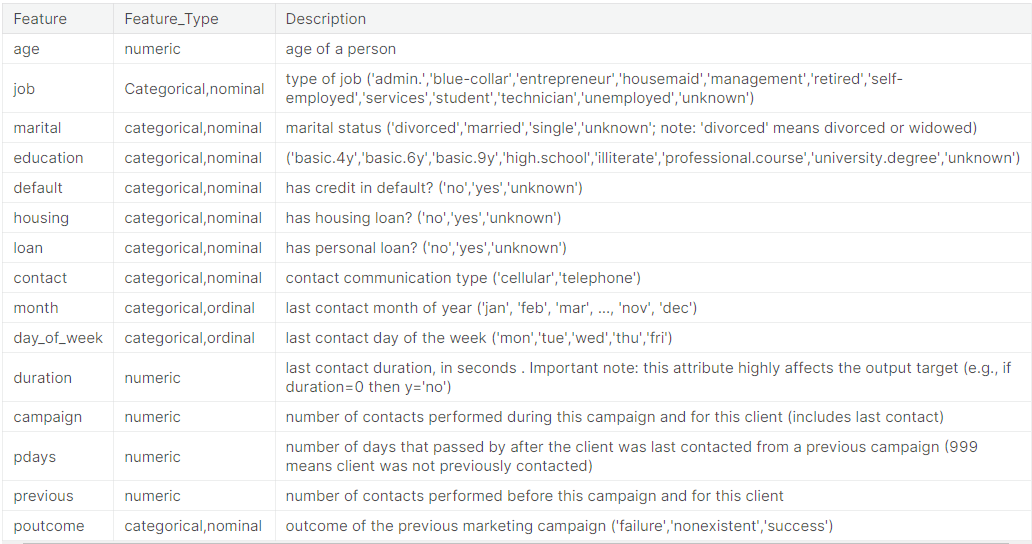

In [5]:
# Instalar o polars
!pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 36.4 MB/s eta 0:00:00


In [6]:
# Quem importar mais rápido?
import polars as pl
import time

# Spark
inicio = time.time()
spark.read.csv('data.csv', header=True, inferSchema=True)
fim = time.time()
tempo_execucao = fim - inicio
print(f'Spark Executou em: {tempo_execucao:.6f} segundos')

# Polars
inicio = time.time()
pl.read_csv('data.csv')
fim = time.time()
tempo_execucao = fim - inicio
print(f'Polars Executou em: {tempo_execucao:.6f} segundos')

# Pandas
inicio = time.time()
pd.read_csv('data.csv')
fim = time.time()
tempo_execucao = fim - inicio
print(f'Pandas Executou em: {tempo_execucao:.6f} segundos')

Spark Executou em: 1.064955 segundos
Polars Executou em: 0.130229 segundos
Pandas Executou em: 0.032257 segundos


In [7]:
# Veriricar o schema dos dados
Base_Dados.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: integer (nullable = true)
 |-- marital: integer (nullable = true)
 |-- education: integer (nullable = true)
 |-- default: integer (nullable = true)
 |-- housing: integer (nullable = true)
 |-- loan: integer (nullable = true)
 |-- contact: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- poutcome: integer (nullable = true)



In [8]:
# Verificar tipo da informação
type( Base_Dados )

pyspark.sql.dataframe.DataFrame

In [9]:
# Dimensão do dataframe
def shape( df ):
  num_linhas = df.count()
  num_colunas = len(df.columns)
  return ( num_linhas, num_colunas) 

shape( Base_Dados )

(8238, 13)

In [10]:
# Verificar primeiras linhas
Base_Dados.head(5)

[Row(age=32, job=4, marital=0, education=6, default=0, housing=0, loan=0, contact=0, month=3, day_of_week=3, duration=131, campaign=5, poutcome=1),
 Row(age=37, job=10, marital=3, education=6, default=0, housing=0, loan=0, contact=0, month=4, day_of_week=3, duration=100, campaign=1, poutcome=1),
 Row(age=55, job=5, marital=0, education=5, default=1, housing=2, loan=0, contact=0, month=3, day_of_week=2, duration=131, campaign=2, poutcome=1),
 Row(age=44, job=2, marital=1, education=0, default=1, housing=0, loan=0, contact=1, month=4, day_of_week=3, duration=48, campaign=2, poutcome=1),
 Row(age=28, job=0, marital=2, education=3, default=0, housing=0, loan=0, contact=0, month=5, day_of_week=0, duration=144, campaign=2, poutcome=1)]

In [11]:
# Mostrar os valores
Base_Dados.show( n=5, vertical=False )

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+--------+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|poutcome|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+--------+
| 32|  4|      0|        6|      0|      0|   0|      0|    3|          3|     131|       5|       1|
| 37| 10|      3|        6|      0|      0|   0|      0|    4|          3|     100|       1|       1|
| 55|  5|      0|        5|      1|      2|   0|      0|    3|          2|     131|       2|       1|
| 44|  2|      1|        0|      1|      0|   0|      1|    4|          3|      48|       2|       1|
| 28|  0|      2|        3|      0|      0|   0|      0|    5|          0|     144|       2|       1|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+--------+
only showing top 5 rows



In [12]:
# Tipos da informação
Base_Dados.dtypes

[('age', 'int'),
 ('job', 'int'),
 ('marital', 'int'),
 ('education', 'int'),
 ('default', 'int'),
 ('housing', 'int'),
 ('loan', 'int'),
 ('contact', 'int'),
 ('month', 'int'),
 ('day_of_week', 'int'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('poutcome', 'int')]

In [13]:
# Retornar eliminado as linhas vazias/nulas
Base_Dados = Base_Dados.na.drop()

shape( Base_Dados )

(8238, 13)

In [14]:
# Estatistica Descritiva rapida
Base_Dados.describe().show()

+-------+-----------------+------------------+------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              age|               job|           marital|         education|            default|           housing|               loan|            contact|             month|       day_of_week|          duration|          campaign|          poutcome|
+-------+-----------------+------------------+------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|  count|             8238|              8238|              8238|              8238|               8238|              8238|               8238|               8238|              8238|              8238|              8238|   

In [15]:
# Agrupamento contando
Base_Dados.groupBy('job').count().sort('job').show()

+---+-----+
|job|count|
+---+-----+
|  0| 2108|
|  1| 1813|
|  2|  296|
|  3|  205|
|  4|  579|
|  5|  354|
|  6|  322|
|  7|  773|
|  8|  164|
|  9| 1343|
| 10|  216|
| 11|   65|
+---+-----+



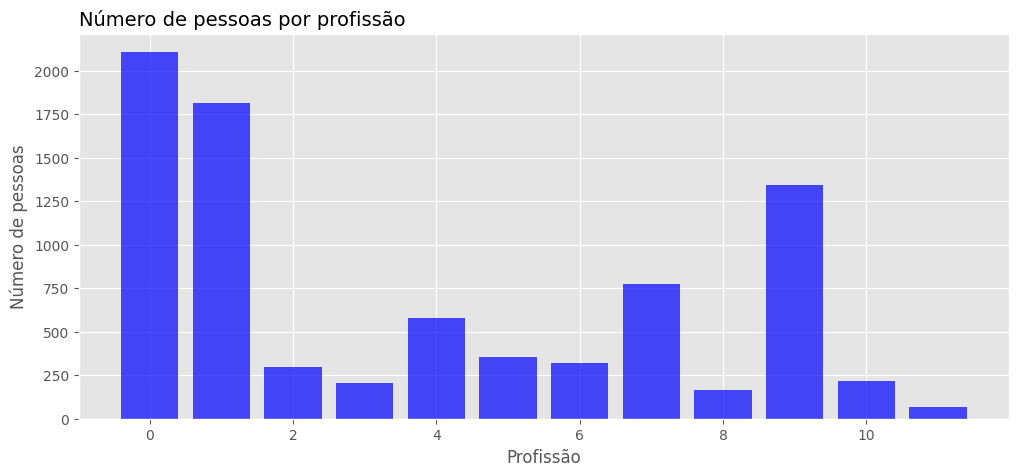

In [16]:
# Executa a análise e converte o resultado para um pandas DataFrame
Analise = Base_Dados.groupBy('job').count().sort('job').toPandas()

# Cria um gráfico de barras com os resultados
plt.figure( figsize=(12, 5) )
plt.style.use('ggplot')
plt.bar( Analise['job'], Analise['count'], color='blue', alpha=0.7 )
#plt.xticks( rotation=90 )
plt.xlabel('Profissão')
plt.ylabel('Número de pessoas')
plt.title('Número de pessoas por profissão', loc='left', fontsize=14);

In [17]:
# Análise da Classe
Base_Dados.groupBy('poutcome').count().show()

+--------+-----+
|poutcome|count|
+--------+-----+
|       1| 7147|
|       2|  268|
|       0|  823|
+--------+-----+



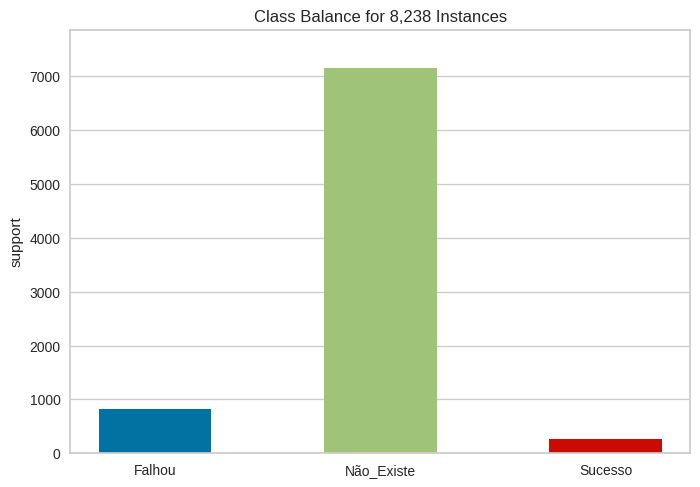

In [18]:
# Separando os dados
Dados_Class = Base_Dados.select('poutcome').toPandas()['poutcome']

# Yellow brick
from yellowbrick.target import ClassBalance

visualizer = ClassBalance( labels=['Falhou', 'Não_Existe', 'Sucesso'] )
visualizer.fit( Dados_Class )
visualizer.show();

In [19]:
# Retirar os "Não existe"
Base_Dados = Base_Dados.filter('poutcome != 1')

shape( Base_Dados )

(1091, 13)

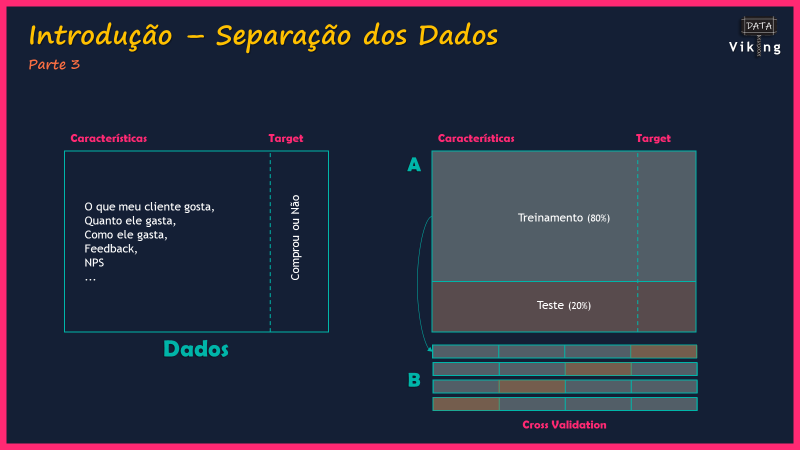

In [20]:
# Separar os dados de caracteristcas e previsor
Selecao_Dados = VectorAssembler( 
    inputCols=Base_Dados.drop('poutcome').columns, 
    outputCol='Variaveis_Caracteristicas' 
)

# Aplicando a transformação
Saida = Selecao_Dados.transform( Base_Dados )

# Selecionado a coluna previsor
Dados_Modelo = Saida.select('Variaveis_Caracteristicas', 'poutcome')

Dados_Modelo.head(5)

[Row(Variaveis_Caracteristicas=DenseVector([55.0, 4.0, 1.0, 7.0, 0.0, 2.0, 0.0, 0.0, 9.0, 0.0, 156.0, 2.0]), poutcome=0),
 Row(Variaveis_Caracteristicas=DenseVector([55.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 66.0, 1.0]), poutcome=0),
 Row(Variaveis_Caracteristicas=DenseVector([43.0, 6.0, 1.0, 6.0, 0.0, 2.0, 0.0, 0.0, 5.0, 1.0, 264.0, 2.0]), poutcome=2),
 Row(Variaveis_Caracteristicas=DenseVector([55.0, 5.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 7.0, 1.0, 554.0, 2.0]), poutcome=0),
 Row(Variaveis_Caracteristicas=DenseVector([55.0, 5.0, 1.0, 7.0, 0.0, 0.0, 2.0, 0.0, 1.0, 3.0, 554.0, 1.0]), poutcome=2)]

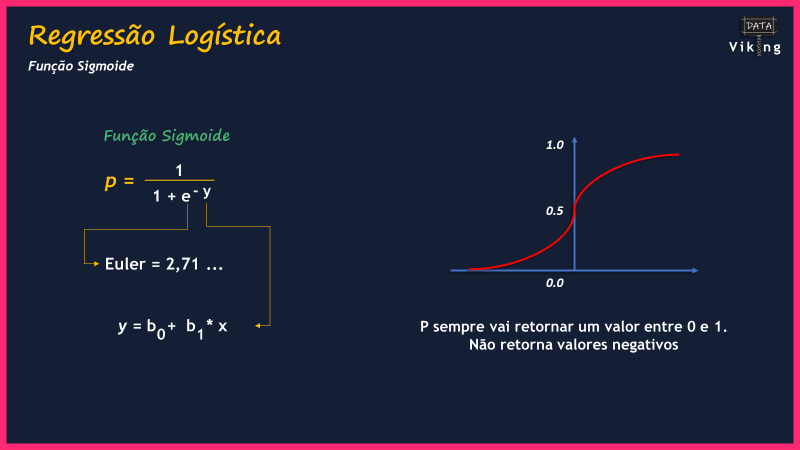

In [21]:
# Separando os dados de Teste e Treino
Dados_Treino, Dados_Teste = Dados_Modelo.randomSplit( [0.75, 0.25] )

# Aplicando as features para o modelo logistico
Funcao_Logistica = LogisticRegression(featuresCol = 'Variaveis_Caracteristicas', labelCol = 'poutcome', maxIter=1000)

# Fitando o Modelo
Funcao_Logistica = Funcao_Logistica.fit(Dados_Treino)

# Fazendo a previsões dos dados de Teste
Previsoes = Funcao_Logistica.transform(Dados_Teste)


**Variaveis_Caracteristicas**: são as variáveis independentes que foram usadas para treinar o modelo.
<br>
<br>
**poutcome**: é a variável dependente ou de saída que foi usada para treinar o modelo.
<br>
<br>
**rawPrediction**: é a saída do modelo antes que a função de ativação seja aplicada. Essa é uma lista de valores que correspondem à pontuação de cada classe possível.
<br>
<br>
**probability**: é a saída do modelo após a aplicação da função de ativação. Essa é uma lista de valores que correspondem à probabilidade de cada classe possível.
<br>
<br>
**prediction**: é a classe prevista para cada linha do conjunto de dados de teste. Essa é a classe com a maior probabilidade na lista de probabilidades.

In [22]:
Previsoes.show()

+-------------------------+--------+--------------------+--------------------+----------+
|Variaveis_Caracteristicas|poutcome|       rawPrediction|         probability|prediction|
+-------------------------+--------+--------------------+--------------------+----------+
|     (12,[0,1,2,3,10,1...|       0|[12.0012558156193...|[0.83717275185708...|       0.0|
|     (12,[0,1,2,3,10,1...|       0|[12.6939003453260...|[0.73746647316766...|       0.0|
|     (12,[0,1,2,3,10,1...|       0|[13.8324274855417...|[0.60281365801072...|       0.0|
|     (12,[0,1,2,3,10,1...|       0|[12.5820666223259...|[0.75909066489450...|       0.0|
|     (12,[0,1,5,8,10,1...|       2|[11.1265619169222...|[0.86196601853586...|       0.0|
|     (12,[0,2,3,8,10,1...|       0|[12.5603408506229...|[0.78584138970555...|       0.0|
|     (12,[0,2,3,8,10,1...|       0|[11.9926510855862...|[0.82765103480397...|       0.0|
|     (12,[0,2,3,8,10,1...|       0|[11.9067137093350...|[0.84459554990928...|       0.0|
|     (12,

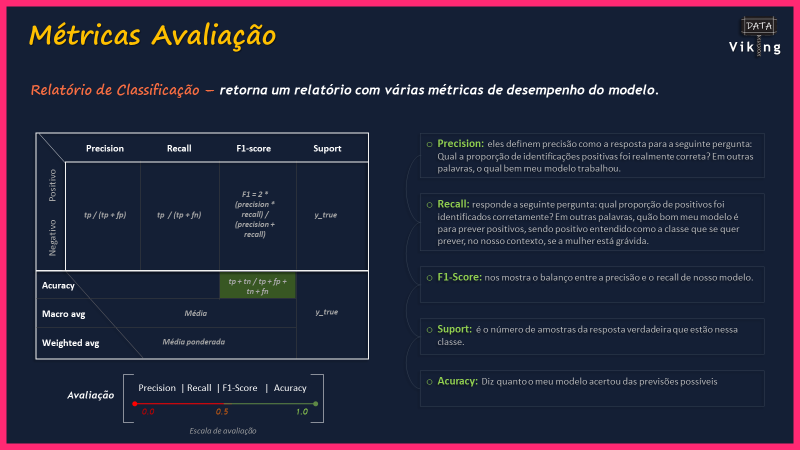

In [23]:
# Calculando a acurácia
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

avaliador = MulticlassClassificationEvaluator(
    predictionCol='prediction', 
    labelCol='poutcome', 
    metricName='accuracy'
)

acuracia = avaliador.evaluate(Previsoes)

print('A acurácia do modelo é: {:.2f}%'.format(acuracia * 100) )

A acurácia do modelo é: 74.19%


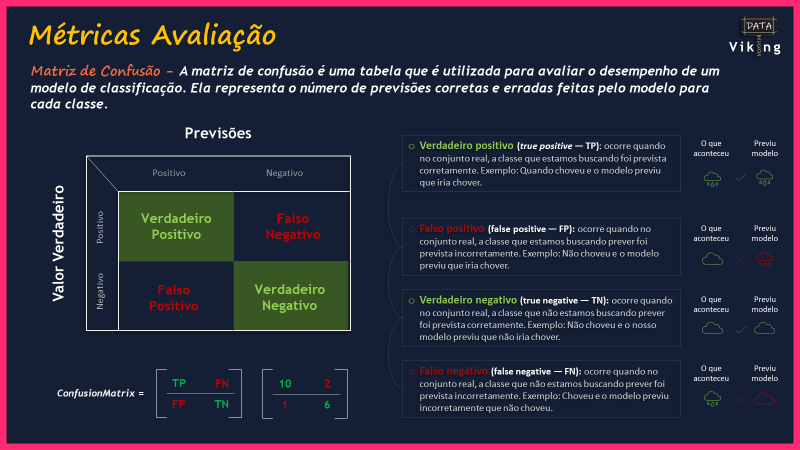

In [25]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix

# Separar os dados de Y_TRUE, Y_PRED
df_previsoes = Previsoes.select('prediction', 'poutcome').toPandas()

# Gero a matriz
matriz_confusao = confusion_matrix(df_previsoes['poutcome'], df_previsoes['prediction'])

print(matriz_confusao)

[[205   4]
 [ 68   2]]
